In [44]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [45]:
path='C:/Zeeshan/Vscode_projects/ML_pipeline/artifacts/data_ingestion/train_data/Insurance_data.csv'

In [46]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder,LabelEncoder


df = pd.read_csv(path,index_col=[0])
df.drop_duplicates(inplace=True)
y=df.iloc[:,-1]

cat_feat =df.dtypes[df.dtypes!='O'].index
cat_feat=cat_feat[:-1]

def outliers(df):
    for i in df.columns:
        q1=df.loc[:,[i]].quantile(0.25)
        q3=df.loc[:,[i]].quantile(0.75)
        IQR = q3-q1
        lower = q1 - (1.5*IQR)
        upper = q3 + (1.5*IQR)
        df.loc[df[i]<=lower[0],i]=lower[0]
        df.loc[df[i]>=upper[0],i]=upper[0]
    return df


df[cat_feat] = outliers(df[cat_feat])


# Identify the columns that should be scaled
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
scale_cols = num_cols.drop(df.columns[-1])

# Identify the columns that should be encoded
encode_cols = df.select_dtypes(include=['object']).columns

# Create the transformers: a StandardScaler for the scaled columns and a OneHotEncoder for the encoded columns
scale_transformer = StandardScaler()
encode_transformer = OrdinalEncoder()

# Use the ColumnTransformer to apply the transformers to the appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', scale_transformer, scale_cols),
        ('encode', encode_transformer, encode_cols)
    ])

# Use a pipeline to apply the ColumnTransformer and any other desired processing steps
pipeline = Pipeline([
    ('preprocessor', preprocessor),
])

# Fit the pipeline to the data
pipeline.fit(df)

# Transform the data
transformed_data = pipeline.transform(df)
num_columns= list(scale_cols)
cat_columns= list(encode_cols)
feature_names = num_columns+cat_columns
df=pd.DataFrame(transformed_data,columns=feature_names)
y = y.reset_index()
df = pd.concat([df,y],axis=1)
df = df.drop(columns=['index'])
df



,age,bmi,children,sex,smoker,region,expenses
0,0.472227,-1.757855,0.734336,0.0,0.0,1.0,9193.84
1,0.543313,-1.041339,-0.911192,0.0,0.0,0.0,8534.67
2,0.898745,-0.941360,-0.911192,0.0,0.0,2.0,27117.99
3,-0.025379,0.624978,3.202629,0.0,0.0,2.0,8596.83
4,1.040918,-1.507908,1.557100,0.0,0.0,1.0,12475.35
...,...,...,...,...,...,...,...
1065,-1.518194,0.141746,2.379865,0.0,0.0,0.0,4561.19
1066,-0.025379,-1.107992,3.202629,0.0,0.0,2.0,8582.30
1067,1.325264,-0.891370,-0.911192,1.0,0.0,0.0,11931.13
1068,-0.167551,2.732868,0.734336,0.0,1.0,3.0,46113.51


<AxesSubplot: >

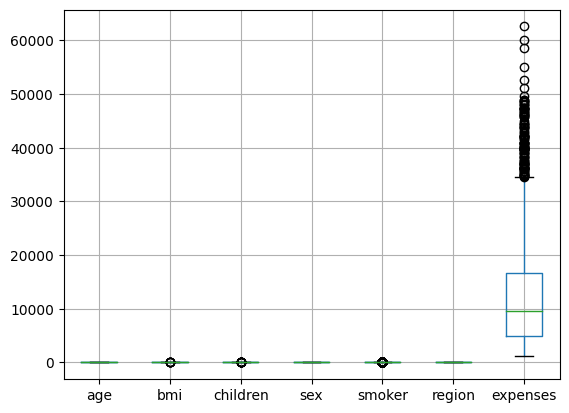

In [47]:
df.boxplot()

In [48]:
df.shape

(1070, 7)

In [21]:
df

,age,bmi,children,sex,smoker,region
0,1.549476,-1.426692,-0.909887,0.0,0.0,0.0
1,-0.372297,-0.652840,-0.077757,0.0,0.0,2.0
2,0.410648,-0.043638,-0.909887,1.0,1.0,2.0
3,-1.511125,0.417381,-0.909887,0.0,0.0,0.0
4,1.478299,-2.035895,-0.909887,0.0,0.0,0.0
...,...,...,...,...,...,...
1322,0.624178,-0.438796,-0.077757,1.0,1.0,3.0
1323,1.051239,0.335056,-0.909887,0.0,0.0,0.0
1324,-0.585827,1.454672,-0.077757,1.0,0.0,2.0
1325,-1.511125,0.121012,2.418631,0.0,0.0,0.0


In [36]:
df1=pd.DataFrame(y)
df1=df1.reset_index()
pd.concat([df,df1],axis=1)

,age,bmi,children,sex,smoker,region,index,expenses
0,1.549476,-1.426692,-0.909887,0.0,0.0,0.0,2807,13616.36
1,-0.372297,-0.652840,-0.077757,0.0,0.0,2.0,2889,5002.78
2,0.410648,-0.043638,-0.909887,1.0,1.0,2.0,3976,62592.87
3,-1.511125,0.417381,-0.909887,0.0,0.0,0.0,3288,2207.70
4,1.478299,-2.035895,-0.909887,0.0,0.0,0.0,1074,13204.29
...,...,...,...,...,...,...,...,...
1322,0.624178,-0.438796,-0.077757,1.0,1.0,3.0,1390,23568.27
1323,1.051239,0.335056,-0.909887,0.0,0.0,0.0,1899,10923.93
1324,-0.585827,1.454672,-0.077757,1.0,0.0,2.0,955,3875.73
1325,-1.511125,0.121012,2.418631,0.0,0.0,0.0,2433,4561.19
